In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import files
import io
from scipy import optimize
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')
#uploaded = files.upload()

In [3]:
df = pd.read_csv('Fish.csv')
df = df.drop('Species', axis=1, inplace=False)

In [4]:
df.head()


,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()

#df['Species'] = label_encoder.fit_transform(df['Species'])
#df['Species'].unique()

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Weight', axis=1, inplace=False)
y = df['Weight']

In [8]:
corr = df.corr()
corr

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


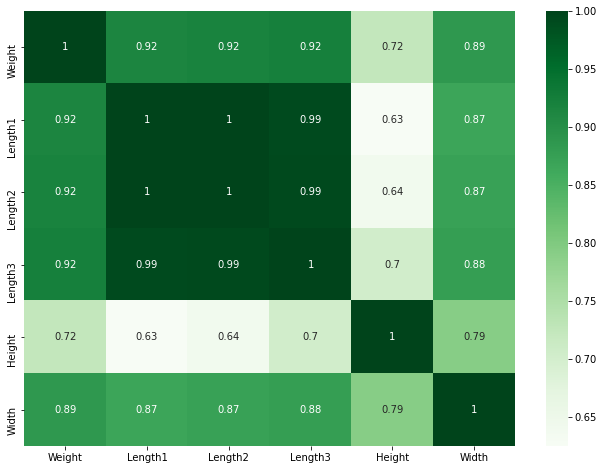

In [9]:
plt.figure(figsize=(11, 8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

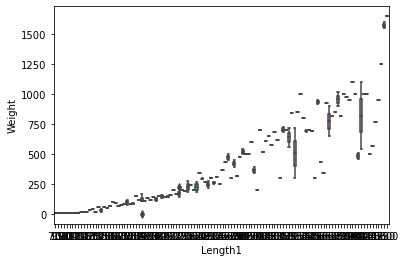

In [10]:
sns.boxplot(x='Length1', y='Weight', data=df);

In [11]:
df

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((127, 5), (32, 5), (127,), (32,))

In [14]:
y_test

23      680.0
97      145.0
6       500.0
9       500.0
48      169.0
14      600.0
137     500.0
149       9.8
11      500.0
69      200.0
100     197.0
32      925.0
53      272.0
120     900.0
67      170.0
85      130.0
113     700.0
108     320.0
138     567.0
26      720.0
157      19.7
37       78.0
84      125.0
95      170.0
39      120.0
30      920.0
27      714.0
103     260.0
42      120.0
142    1600.0
54      390.0
115     690.0
Name: Weight, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [16]:
regressor.intercept_

-482.2605260672914

In [17]:
regressor.coef_

array([ 76.60457338, -19.20798821, -30.9894573 ,  28.05010073,
        30.63069947])

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
y_pred

array([ 644.99370807,  247.79902778,  490.54906433,  540.433677  ,
        227.95067029,  580.30814425,  728.47474185, -164.43483014,
        549.61852451,  302.86406516,  303.38734908,  861.09231168,
        352.51270348,  817.07171065,  224.68728681,  167.83869988,
        747.97292141,  451.61590969,  802.0409072 ,  684.12536631,
        -72.89202846,   85.59278018,  144.60911525,  228.72738382,
        154.29849476,  791.8601712 ,  687.69802171,  373.50541025,
        138.47216632, 1129.26700812,  514.13275803,  731.22713842])

In [20]:
print('coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)
print("mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))
print('coefficient of determination (R^2): %.2f' %r2_score(y_test, y_pred))


coefficients: [ 76.60457338 -19.20798821 -30.9894573   28.05010073  30.63069947]
Intercept: -482.2605260672914
mean squared error (MSE): 15781.15
coefficient of determination (R^2): 0.87


In [21]:
np.array(y_test)

array([ 680. ,  145. ,  500. ,  500. ,  169. ,  600. ,  500. ,    9.8,
        500. ,  200. ,  197. ,  925. ,  272. ,  900. ,  170. ,  130. ,
        700. ,  320. ,  567. ,  720. ,   19.7,   78. ,  125. ,  170. ,
        120. ,  920. ,  714. ,  260. ,  120. , 1600. ,  390. ,  690. ])

In [22]:
from sklearn.metrics import r2_score
print('R2 Score', r2_score(y_test, y_pred))

R2 Score 0.8675444655694375


In [23]:
X_test = np.mean(X_test)
y_test = np.mean(y_test)


In [24]:
import statsmodels.api as sm
X = sm.add_constant(X_train)

In [25]:
results = sm.OLS(y_train,X).fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     192.2
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           8.28e-56
Time:                        13:25:16   Log-Likelihood:                -788.31
No. Observations:                 127   AIC:                             1589.
Df Residuals:                     121   BIC:                             1606.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -482.2605     32.002    -15.070      0.000    -545.616    -418.905
Length1       76.6046     45.295      1.691      0.093     -13.068     166.277
Length2      -19.2080     47.148     -0.407      0.684    -112.550      74.134
Length3      -30.9895     19.106     -1.622      0.107     -68.815       6.837
Height        28.0501      9.559      2.934      0.004       9.125      46.975
Width         30.6307     22.736      1.347      0.180     -14.381      75.642
==============================================================================
Omnibus:                       14.048   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.490
Skew:                           0.738   Prob(JB):                     0.000433
Kurtosis:                       3.866   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
print("Standard errors: ", results.bse)

Standard errors:  const      32.001735
Length1    45.294544
Length2    47.148094
Length3    19.106331
Height      9.559105
Width      22.735647
dtype: float64


In [28]:
#ridge

In [29]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = regressor.predict(X_test)

ValueError: Expected 2D array, got 1D array instead:
array=[27.578125   29.875      33.025       9.82484063  4.6826875 ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
y_pred

In [ ]:
np.array(y_test)

In [ ]:
from sklearn.metrics import r2_score
print('R2 Score', r2_score(y_test, y_pred))

In [ ]:
results = sm.OLS(y_train,X_train).fit()

In [ ]:
results.summary()

In [ ]:
#lasso

In [ ]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

In [ ]:
y_predz = lasso.predict(X_test)

In [ ]:
y_predz

In [ ]:
np.array(y_test)

In [ ]:
from sklearn.metrics import r2_score
print('R2 Score', r2_score(y_test, y_predz))

In [ ]:
lassoresults = sm.OLS(y_train,X_train).fit()

In [ ]:
lassoresults.summary()